In [6]:
#فراخوانی کتابخانه ها
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn_extra.cluster import KMedoids

In [2]:
#تبدیل فایل به دیتافریم
df = pd.read_csv("xclara.csv")
df1 = pd.DataFrame(df)
df1

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


<Axes: xlabel='V1', ylabel='V2'>

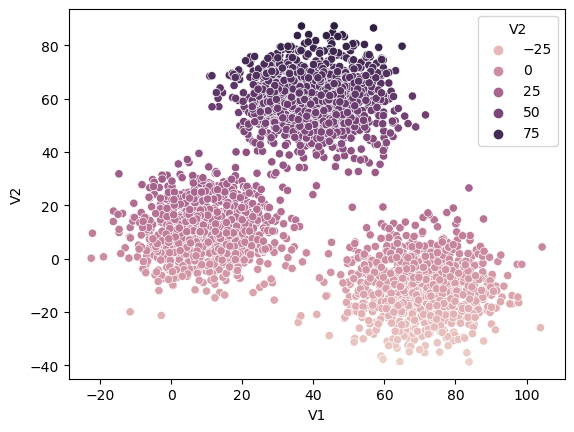

In [3]:
#اسکتر گرفتن از داده های دیتافریم
sns.scatterplot(x=df1["V1"],y=df1["V2"],hue=df1["V2"])

In [4]:
#استاندارد کردن داده ها , فیت کردن و خوشه ای کردن آنها
km = StandardScaler()
y = km.fit_transform(df1)
y

array([[-1.49059736, -0.82205354],
       [-0.87700146, -0.22287703],
       [-1.52884059, -0.48947405],
       ...,
       [ 0.92261449, -1.05067264],
       [ 1.93819213, -1.10592416],
       [ 0.93864404, -1.50339543]])

In [5]:
#افزودن پارامتر های ورودی الگوریتم مورد نظر درون دیکشنری
parameters={"init":"random","n_init":10,"max_iter":300,"random_state":40}

In [6]:
#فیت کردن داده ها با اعداد 2تا20 و پارامتر ها و ریختن آن درون یک لیست
#elbow روش
list=[]
for i in range(2,21):
    kmeans = KMeans(n_clusters=i,**parameters)
    kmeans.fit(y)
    list.append(kmeans.inertia_)
list

C:\Users\Montazer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Montazer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Montazer\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Montazer\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Montazer\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _w

[2702.5491436187085,
 765.2969879455554,
 651.2571100377481,
 551.5965424842063,
 462.5798018973538,
 422.76035706275724,
 373.07957661483056,
 345.0985638677561,
 308.198207420826,
 280.7374197865836,
 262.4679942730998,
 246.77641973079605,
 235.0194814448725,
 220.66955256364136,
 206.12973255568843,
 195.3805998387527,
 187.80791197370715,
 176.69228213281826,
 168.48055304672175]

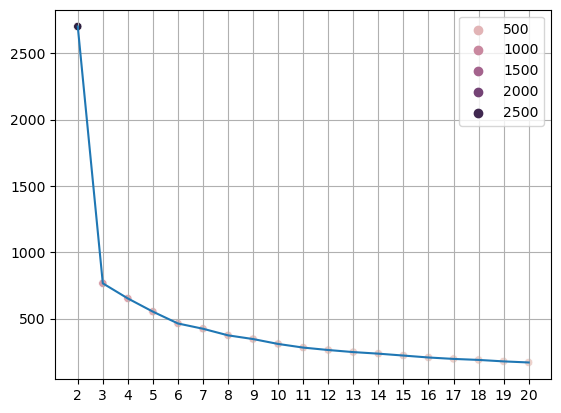

In [7]:
#گرفتن نمودار از لیست بالا با سیبورن و متپلاتلیب
sns.scatterplot(x=range(2,21),y=list,hue=list)
plt.plot(range(2,21),list)
plt.xticks(range(2,21))
plt.grid()
plt.show()

In [8]:
#k روش دوم برای فهمیدن
kneed1 = KneeLocator(range(2,21),list,curve="convex",direction="decreasing")
kneed1.elbow

3

In [9]:
#حال که عدد مورد نظر مشخص شد دوباره مدل را میسازیم و فیت میکنیم
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df1)
#مشخص شدن مراکز هر خوشه
print(kmeans2.cluster_centers_)

C:\Users\Montazer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


In [14]:
#دقت مدل
list2=[]
for i in range(2,21):
    kmeans2 = KMeans(n_clusters=i,**parameters)
    kmeans2.fit(df1)
    list2.append(silhouette_score(df1,kmeans2.labels_)*100)
    print(i," : \t",silhouette_score(df1,kmeans2.labels_)*100)
index = list2.index(max(list2))+2
print("\nbest k :",index)

2  : 	 54.243506997052606
3  : 	 69.45587736089914
4  : 	 53.952717416636084
5  : 	 40.8694133056022
6  : 	 31.264588111421176
7  : 	 32.14942935487389
8  : 	 32.60838133046709
9  : 	 34.1391415259956
10  : 	 33.24087876950779
11  : 	 32.60125720579444
12  : 	 32.97352570488014
13  : 	 31.495887539635063
14  : 	 31.17945015007839
15  : 	 32.34542921168796
16  : 	 32.162062514379706
17  : 	 32.51970690688109
18  : 	 32.9694513504215
19  : 	 32.945481070710564
20  : 	 32.847882778092966

best k : 3


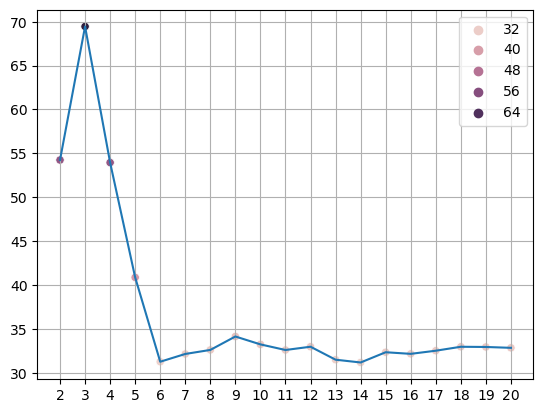

In [16]:
#k پلات گرفتن از ذقت مدل در هر
sns.scatterplot(x=range(2,21),y=list2,hue=list2)
plt.plot(range(2,21),list2)
plt.xticks(range(2,21))
plt.grid()
plt.show()